# Lighthouse Lab Mid-Term
## Capstone Project Part 2
### Dataset: Los Angeles Crime Data Since 2020 to Present

Team: Chloe Phuong and Rinkal Raj

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
#%matplotlib inline     
sns.set(color_codes=True)
import seaborn.objects as so
from pathlib import Path
import plotly.express as px

In [2]:
# Read the CSV file
df = pd.read_csv('clean_crime_data.csv')

# Print the contents of the DataFrame
df.head(5)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,Status Desc,Crm Cd 1,LOCATION,LAT,LON,Crime_Code_Count
0,10304468,1/8/2020 0:00,1/8/2020 0:00,22:30,Southwest,624,BATTERY - SIMPLE ASSAULT,36,Female,Unknown,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Other,624.0,1100 W 39TH PL,34.0141,-118.2978,76976
1,190101086,1/2/2020 0:00,1/1/2020 0:00,03:30,Central,624,BATTERY - SIMPLE ASSAULT,25,Male,Unknown,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,624.0,700 S HILL ST,34.0459,-118.2545,76976
2,200110444,4/14/2020 0:00,2/13/2020 0:00,12:00,Central,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,Unknown,Unknown,POLICE FACILITY,Unknown,Adult Arrest,845.0,200 E 6TH ST,34.0448,-118.2474,972
3,191501505,1/1/2020 0:00,1/1/2020 0:00,17:30,N Hollywood,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,Female,Unknown,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",Unknown,Invest Cont,745.0,5400 CORTEEN PL,34.1685,-118.4019,27806
4,191921269,1/1/2020 0:00,1/1/2020 0:00,04:15,Mission,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,Unknown,Unknown,BEAUTY SUPPLY STORE,Unknown,Invest Cont,740.0,14400 TITUS ST,34.2198,-118.4468,57811


In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df.describe()

#### EDA 1: The distribution of crimes based on the victim's sex

<Axes: xlabel='Crm Cd', ylabel='Density'>

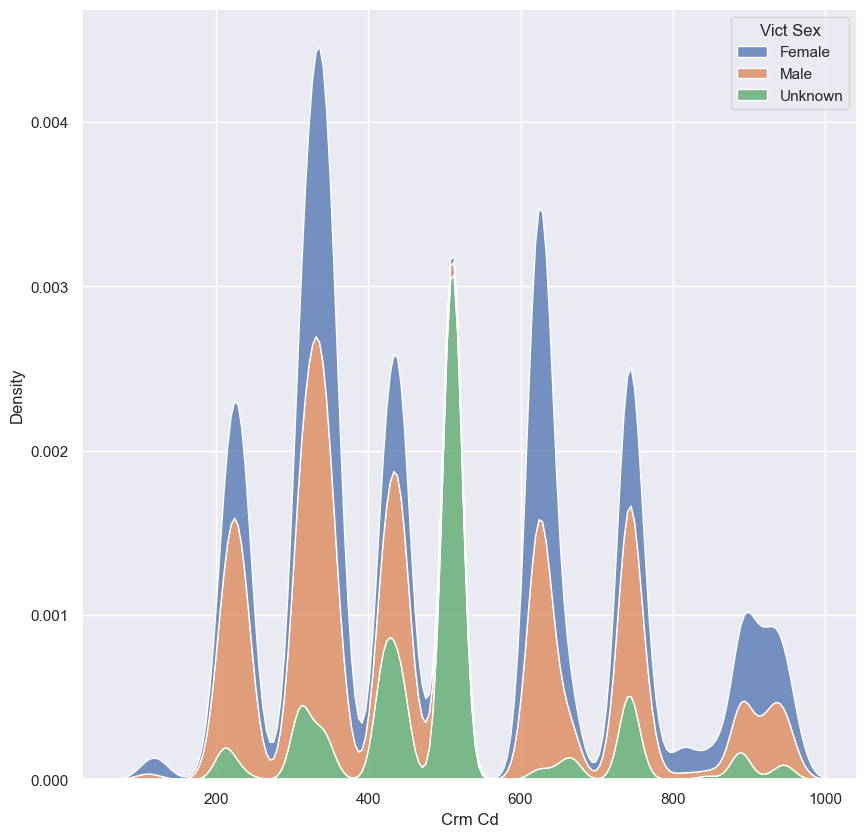

In [11]:
fig=plt.figure(figsize=(10,10))
sns.kdeplot(data=df, x="Crm Cd", hue="Vict Sex", multiple="stack")
#fig.savefig('IMG/img1.png',facecolor='w')

#### EDA 2: What are the proportions of different victim descent groups among female victims?

In [12]:
x = df['Vict Sex'] == 'Female'
y = df['Vict Sex'] == 'Male'
sub_df = df[x | y]

<Figure size 640x480 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

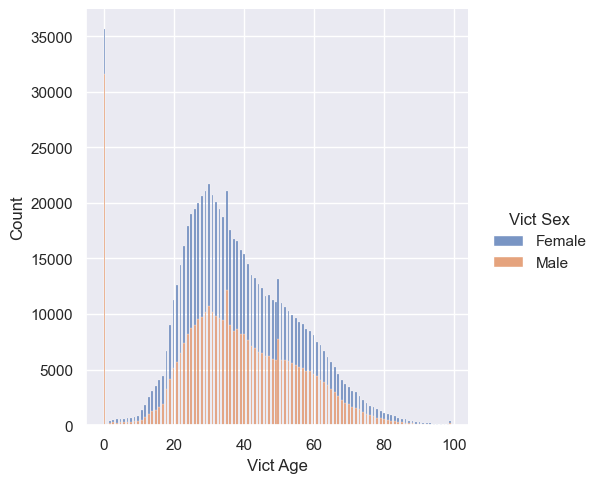

In [13]:
plt.clf()
fig=plt.figure(figsize=(10,10))
graph = sns.displot(data=sub_df, x="Vict Age", hue="Vict Sex", multiple="stack")
fig = graph.fig
#fig.savefig('IMG/img2.png',facecolor = 'w')

#### EDA 3: Relationship between Victim Age and Crime Type for Females: Is there any relationship between the age of female victims and the type of crime they experience?

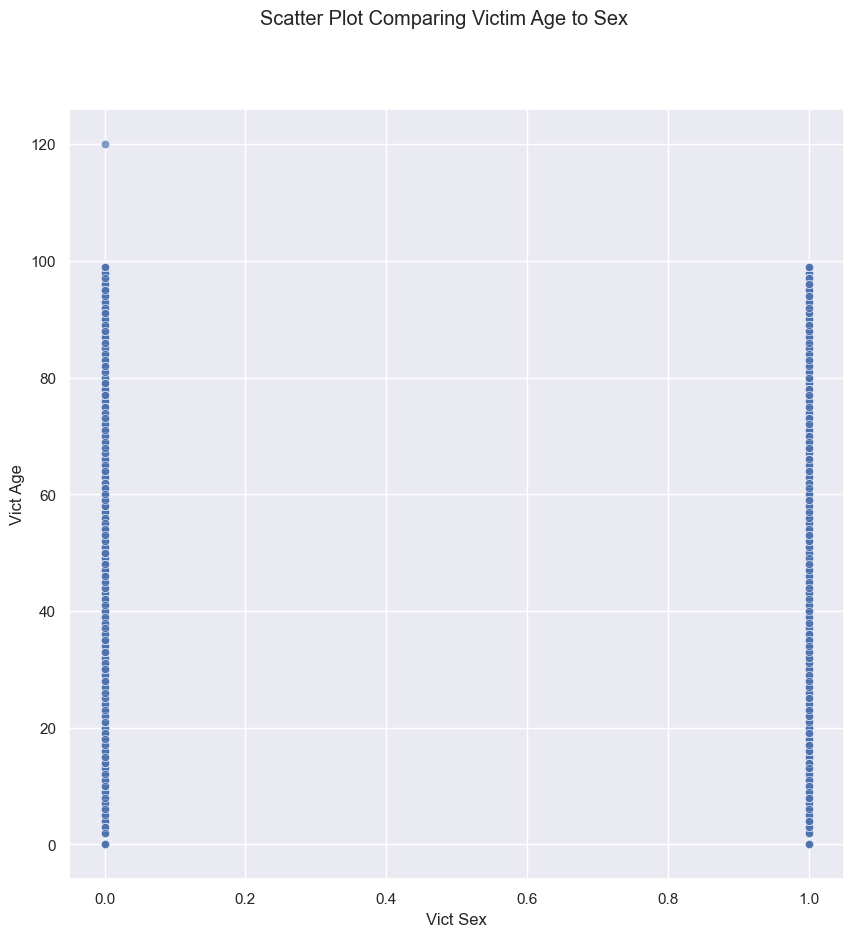

In [15]:
fig=plt.figure(figsize=(10,10))
sns.scatterplot(data=df, 
                x=df['Vict Sex'] == 'Female', 
                y=df['Vict Age'],
                alpha = 0.7)
plt.suptitle("Scatter Plot Comparing Victim Age to Sex")
#fig.savefig('IMG/img3.png',facecolor='w')
plt.show()

#### EDA 4: Status of Reported Crimes against Females: What is the status of reported crimes against females? (compare to Male)

<Axes: xlabel='Status Desc', ylabel='Count'>

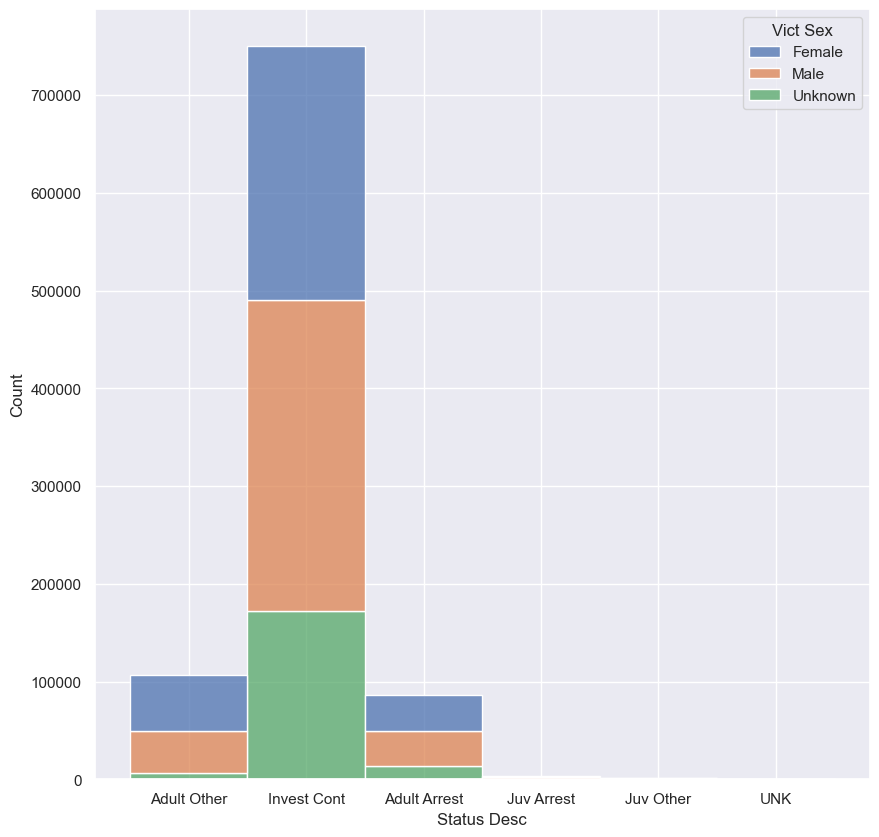

In [23]:
fig=plt.figure(figsize=(10,10))
sns.histplot(data=df, x="Status Desc", hue="Vict Sex", multiple="stack")
#fig.savefig('IMG/img4.png',facecolor='w')

<Figure size 1000x1000 with 0 Axes>

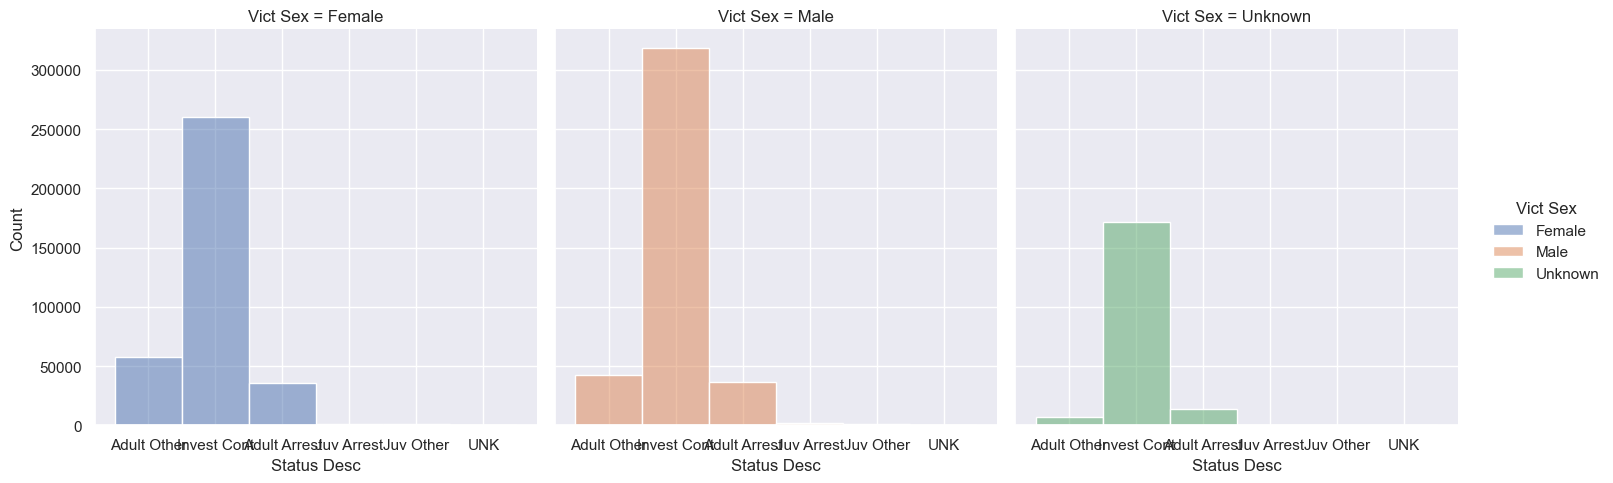

In [18]:
fig=plt.figure(figsize=(10,10))
graph = sns.displot(data=df, x="Status Desc", hue="Vict Sex", col="Vict Sex")
fig = graph.fig
#fig.savefig('IMG/img4_1.png',facecolor='w')

#### EDA 5: List of female victim who belongs to differernt descent.

<Figure size 1000x1000 with 0 Axes>

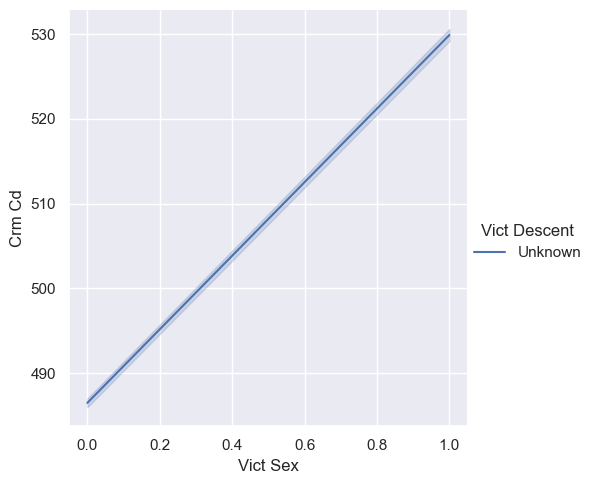

In [3]:
fig=plt.figure(figsize=(10,10))
graph = sns.relplot(data=df, x=df['Vict Sex']== 'Female', y="Crm Cd", hue="Vict Descent", kind="line")
fig = graph.fig
#fig.savefig('IMG/img5.png',facecolor='w')

#### EDA 6: List of Weapons which mostly use by women

<Figure size 1000x1000 with 0 Axes>

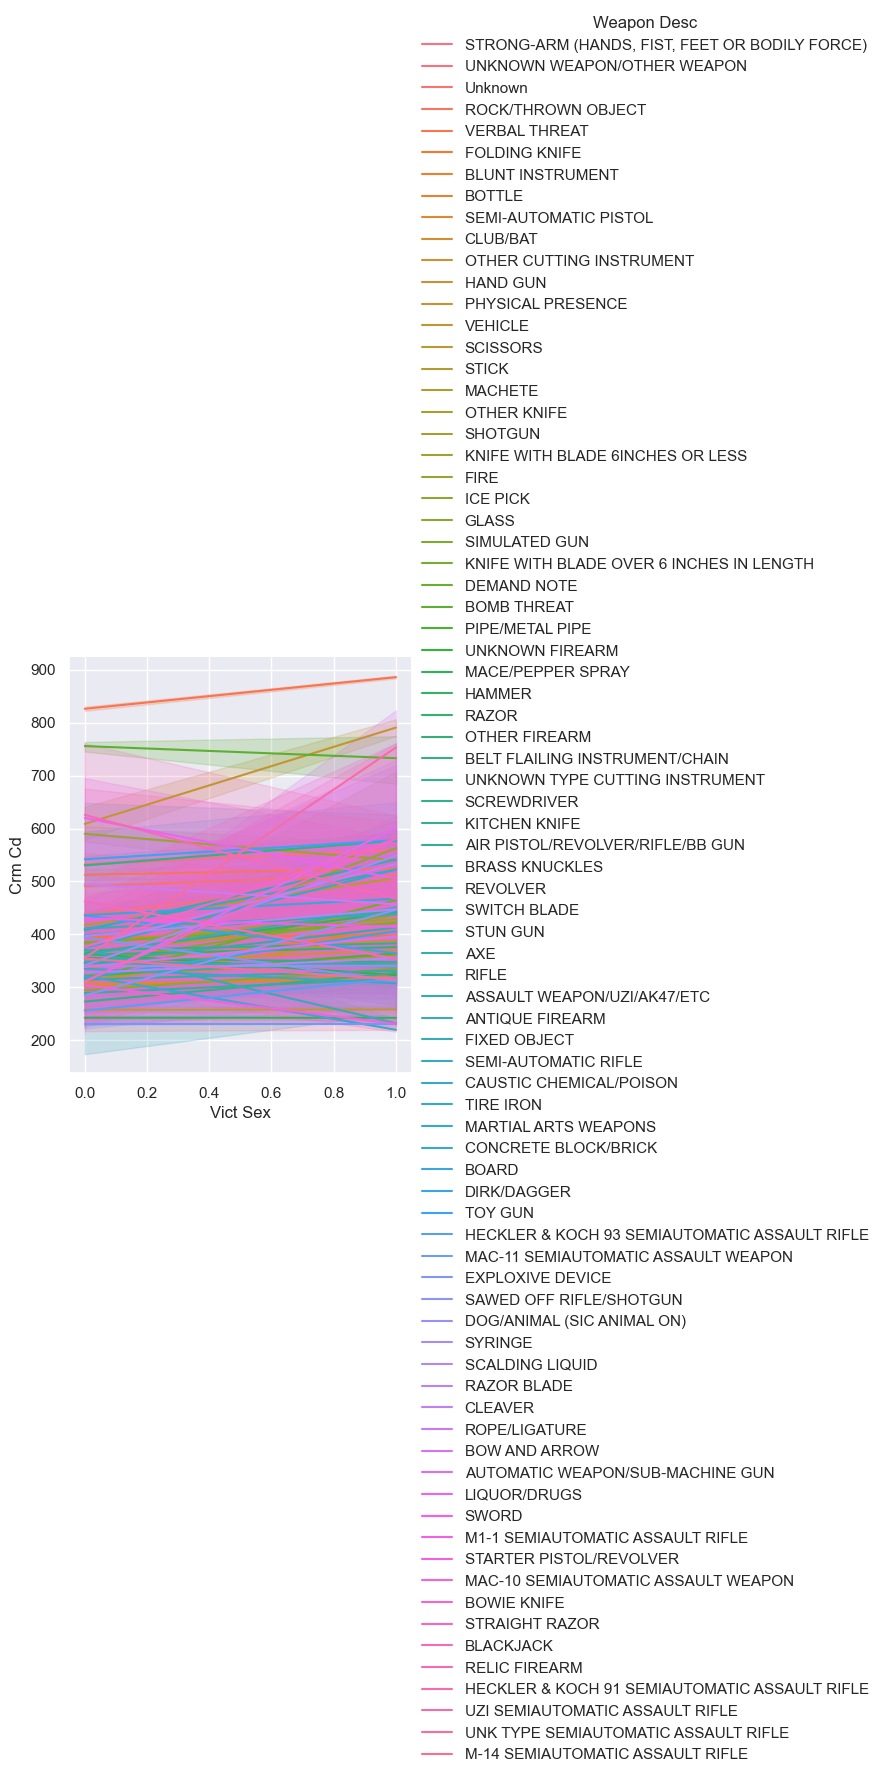

In [4]:
fig=plt.figure(figsize=(10,10))
graph = sns.relplot(
    data=df, kind="line",
    x=df['Vict Sex']=='Female', y="Crm Cd", hue="Weapon Desc",
)
fig = graph.fig
#fig.savefig('IMG/img6.png',facecolor='w')

#### EDA 7: Explore more data about victims' Descent, gender, age. What types of crime occured and what is the status of the crime

In [5]:
fig = px.scatter(df, x='Vict Descent', y='Crm Cd', color='Vict Sex', size='Vict Age', hover_data=['Status Desc'])
fig.show()
#fig.write_image('IMG/img7.png')

Error importing optional module nbformat
Traceback (most recent call last):
  File "c:\Users\chloe\anaconda3\envs\the_one\lib\site-packages\_plotly_utils\optional_imports.py", line 30, in get_module
    return import_module(name)
  File "c:\Users\chloe\anaconda3\envs\the_one\lib\importlib\__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "<frozen importlib._bootstrap>", line 1050, in _gcd_import
  File "<frozen importlib._bootstrap>", line 1027, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1006, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 688, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 883, in exec_module
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "c:\Users\chloe\anaconda3\envs\the_one\lib\site-packages\nbformat\__init__.py", line 11, in <module>
    from . import v1, v2, v3, v4
  File "c:\Users\chloe\anacond

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
df.corr()

### EDA 7: This correlation matrix in a visually pleasing way by using a seaborn heatmap

C:\Users\chloe\AppData\Local\Temp/ipykernel_10936/1528405173.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

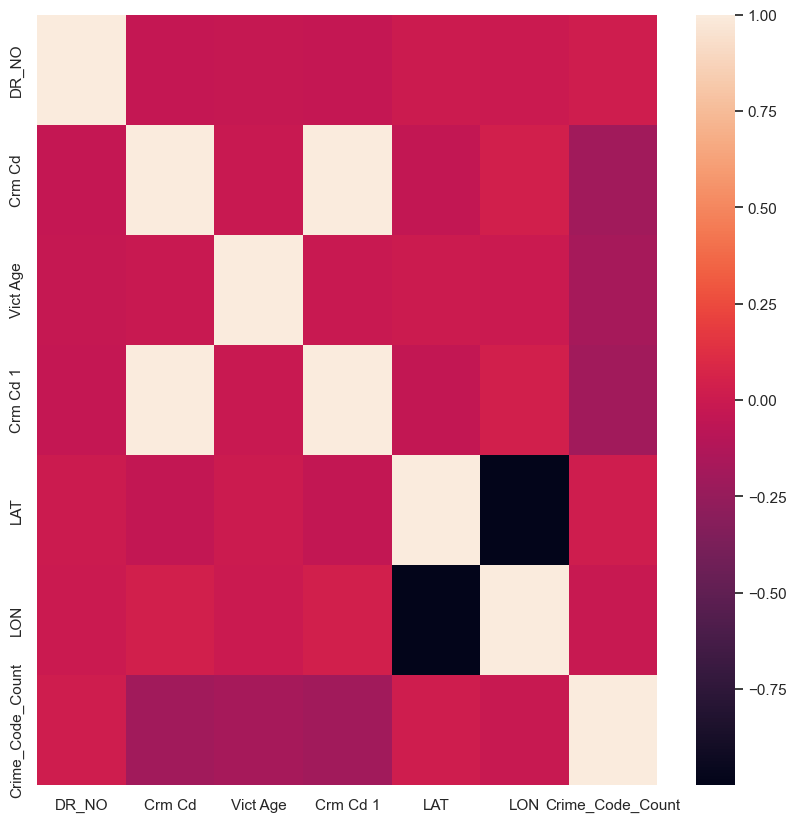

In [10]:
fig=plt.figure(figsize=(10,10))
sns.heatmap(df.corr())
#fig.savefig('IMG/img8.png',facecolor='w')

c:\Users\chloe\anaconda3\envs\the_one\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x1000 with 0 Axes>

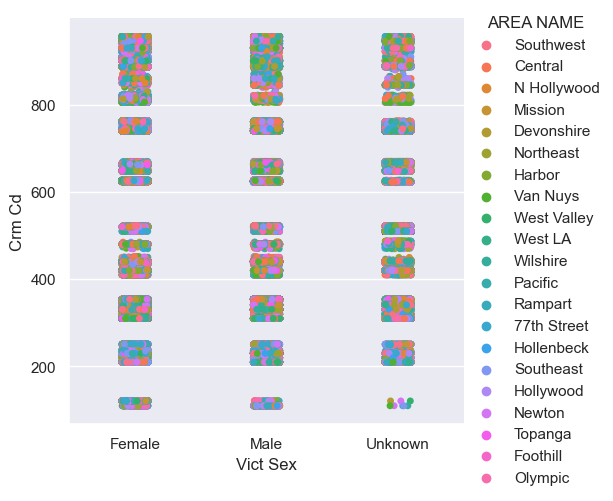

In [5]:
fig=plt.figure(figsize=(10,10))
graph = sns.catplot(data=df, x="Vict Sex", y="Crm Cd",hue = "AREA NAME")
fig = graph.fig
#fig.savefig('IMG/img9.png',facecolor='w')